        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1 head
correlation between Type and Na :  0.5028980422746065


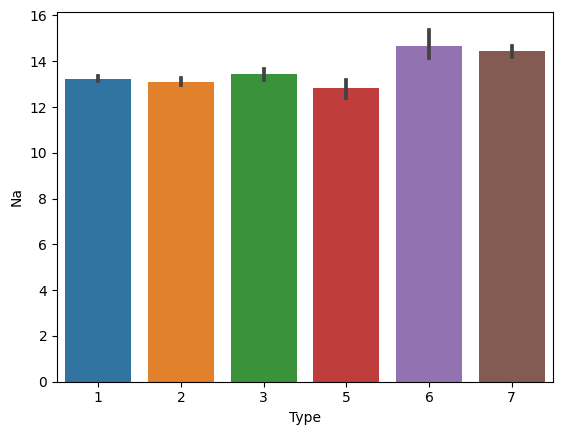

correlation between Type and Si :  0.5028980422746065


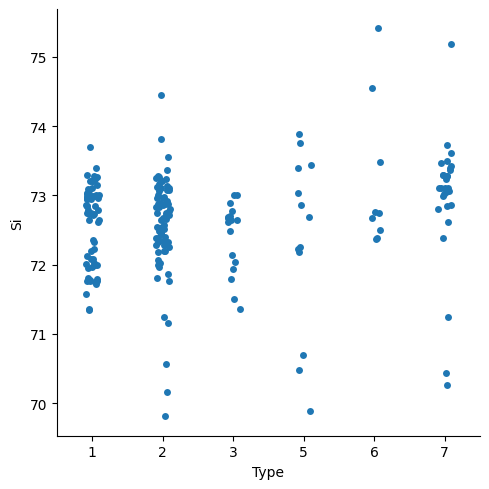

Classification Report:                precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

Confusion Matrix:  [[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Gaussian Naive Bayes accuracy is 0.37209302325581395
              precision    recall  f1-score   support

           1       0.28      0.89      0.42         9
           2       0.40      0.11      0.17        19
           3       0.00      0.00      0.00         5
           5     

In [13]:
#question 2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings # current version generates a bunch of warnings that we'll ignore
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

glass = pd.read_csv("glass.csv")
print(glass.head(),'head')

X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# print("X_train :", X_train)
# print("X_test :", X_test)
# print("y_train :", y_train)
# print("y_test :", y_test)

#visualizations
#correlation between Si and Type
corr_Si_Type = glass["Type"].corr(glass["Na"])
print("correlation between Type and Na : ", corr_Si_Type)

x_input = glass["Type"].dropna()
y_type = glass["Na"].dropna()
sns.barplot(x=x_input, y=y_type, data=glass)
plt.show()
#correlation between Si and Type
corr_Na_Type = glass["Type"].corr(glass["Si"])
print("correlation between Type and Si : ", corr_Si_Type)

x_si = glass["Type"].dropna()
y_type = glass["Si"].dropna()
sns.catplot(x=x_si, y=y_type, data=glass)
plt.show()

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB, ComplementNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Classification Report: ",classification_report(y_test, y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Gaussian Naive Bayes accuracy is',accuracy_score(y_pred,y_test))


# Multinomial Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Multinomial Naive Bayes accuracy is',accuracy_score(y_pred,y_test))


# Bernoulli Naive Bayes
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('Bernoulli Naive Bayes accuracy is',accuracy_score(y_pred,y_test))


# Complement Naive Bayes
classifier = ComplementNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Complement Naive Bayes accuracy is',accuracy_score(y_pred,y_test))



# using svc
svc = LinearSVC()

svc.fit(X_train, y_train)

Y_pred = svc.predict(X_test)
print("SVC Classification Report: ",classification_report(y_test, Y_pred))

acc_svc = svc.score(X_train, y_train)

print("svm accuracy =", acc_svc)

# For the glass dataset, I suggest using SVM classifier over Naive bayes classifiers because SVM gives more accuracy 0.50
# than the Naive bayes classifiers and naive bayes classifiers gives probability distributions based on occurances of independent features
# on the other hand SVM works well for non-linear classification of data

Head : 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN     

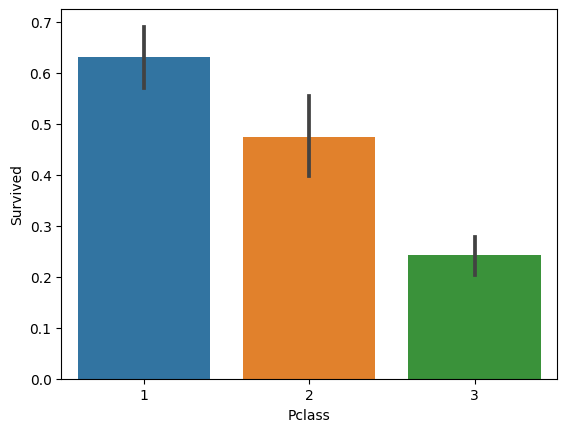

correlation between survived and Fare :  -0.3384810359610148


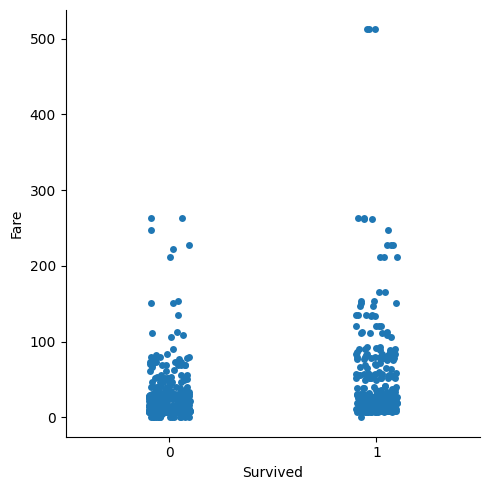

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
Rearranged testing data set: 
    PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0            1       3    1  22.0      1      0   7.2500       1.0   

ValueError: Found input variables with inconsistent numbers of samples: [43, 712]

In [12]:
#question 1
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings # current version generates a bunch of warnings that we'll ignore
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
warnings.filterwarnings("ignore")

training_df = pd.read_csv("train.csv")

print("Head : \n", training_df.head())
# converting string values of male and female as 0 and 1
sex_int_type = training_df["Sex"].astype('category').cat.codes
print("After conversion sex  column will be : ",sex_int_type)
print("correlation between survived and sibsp : ", training_df["Survived"].corr(training_df["SibSp"]))
print("correlation between survived and parch : ", training_df["Survived"].corr(training_df["Parch"]))
corr = training_df["Survived"].corr(sex_int_type)
print("Correlation between Survived and Sex columns : ", corr)

# Since the correlation between Survived and sex columns is -0.54, the relationship between them is 
# moderate negative, so, it wont affect we can skip this feature

import seaborn as sns
import matplotlib.pyplot as plt

# visualization for pclass vs survived
corr_pclass_survived = training_df["Survived"].corr(training_df["Pclass"])
print("correlation between survived and Pclass : ", corr_pclass_survived)

x_pclass = training_df["Pclass"].dropna()
y_survived = training_df["Survived"].dropna()
sns.barplot(x=x_pclass, y=y_survived, data=training_df)
plt.show()

# visualization for fare vs survived
corr_fare_survived = training_df["Survived"].corr(training_df["Fare"])
print("correlation between survived and Fare : ", corr_pclass_survived)
x_fare = training_df["Survived"].dropna()
y_survived = training_df["Fare"].dropna()
sns.catplot(x=x_fare, y=y_survived, data=training_df)
plt.show()

testing_df = pd.read_csv("test.csv")
print(testing_df.head())

testing_rearranged = training_df[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]]
testing_rearranged['Sex'] = testing_rearranged['Sex'].replace(["female", "male"], [0, 1])
testing_rearranged['Embarked'] = testing_rearranged['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
#dropping null values
testing_rearranged.dropna(axis=0, inplace=True)
print("Rearranged testing data set: \n",testing_rearranged.head())

X_testing_rearraged_df = testing_rearranged.iloc[:, :-1].values
Y_testing_rearraged_df = testing_rearranged.iloc[:, -1].values

# changing categorical values to numeric
training_rearranged = training_df[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]]
training_rearranged['Sex'] = training_rearranged['Sex'].replace(["female", "male"], [0, 1])
training_rearranged['Embarked'] = training_rearranged['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

#dropping null values
training_rearranged.dropna(axis=0, inplace=True)
print("Rearranged data set: \n",training_rearranged.head())

X_training_rearraged_df = training_rearranged.iloc[:, :-1].values
Y_training_rearraged_df = training_rearranged.iloc[:, -1].values

print(X_training_rearraged_df,'check')

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB, ComplementNB
classifier = GaussianNB()
classifier.fit(X_training_rearraged_df, Y_training_rearraged_df)
y_pred = classifier.predict(X_testing_rearraged_df)
print("Classification Report: ",classification_report(y_test, y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Gaussian Naive Bayes accuracy is',accuracy_score(y_pred,y_test))

